<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/%D0%94%D0%97_%D0%9F%D0%A0%D0%9E_4_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_4_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мучаем сетку до 97% поехали.

*Теоретический материал:* https://youtu.be/1goYctVeppE?t=1071

# Import библиотек

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=3423


In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Загрузка файлов

In [3]:
#Загружаем файлы
files.upload()
!ls #Выводим содержимое корневой папки

Saving (Булгаков) Обучающая_5 вместе.txt to (Булгаков) Обучающая_5 вместе.txt
Saving (Булгаков) Тестовая_2 вместе.txt to (Булгаков) Тестовая_2 вместе.txt
Saving (Клиффорд_Саймак) Обучающая_5 вместе.txt to (Клиффорд_Саймак) Обучающая_5 вместе.txt
Saving (Клиффорд_Саймак) Тестовая_2 вместе.txt to (Клиффорд_Саймак) Тестовая_2 вместе.txt
Saving (Макс Фрай) Обучающая_5 вместе.txt to (Макс Фрай) Обучающая_5 вместе.txt
Saving (Макс Фрай) Тестовая_2 вместе.txt to (Макс Фрай) Тестовая_2 вместе.txt
Saving (О. Генри) Обучающая_50 вместе.txt to (О. Генри) Обучающая_50 вместе.txt
Saving (О. Генри) Тестовая_20 вместе.txt to (О. Генри) Тестовая_20 вместе.txt
Saving (Рэй Брэдберри) Обучающая_22 вместе.txt to (Рэй Брэдберри) Обучающая_22 вместе.txt
Saving (Рэй Брэдберри) Тестовая_8 вместе.txt to (Рэй Брэдберри) Тестовая_8 вместе.txt
Saving (Стругацкие) Обучающая_5 вместе.txt to (Стругацкие) Обучающая_5 вместе.txt
Saving (Стругацкие) Тестовая_2 вместе.txt to (Стругацкие) Тестовая_2 вместе.txt
 sample_da

#Загрузка данных

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=3504


In [0]:
###########################
# Чтение файла в текст
##########################
def readText(fileName): #функция принимает имя файла
  f = open(fileName, 'r')        #задаем открытие нужного файла в режиме чтения
  text = f.read()                #читаем текст
  text = text.replace("\n", " ") #переносы строки переводим в пробелы
  
  return text                    #функция возвращает текст файла

#Загружаем обучающие тексты
trainText = []
trainText.append(readText('(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('(Рэй Брэдберри) Обучающая_22 вместе.txt')) 

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(className)

#Загружаем тестовые тексты
testText = []
testText.append(readText('(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('(Рэй Брэдберри) Тестовая_8 вместе.txt'))

#Обработка данных

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=3592

In [0]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 20000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) #Вытаскиваем индексы слов для просмотра

In [6]:
print(items[10:20])

[('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20)]


In [7]:
print(items[130:140])

[('сэр', 131), ('над', 132), ('лет', 133), ('тогда', 134), ('снова', 135), ('эти', 136), ('тем', 137), ('который', 138), ('куда', 139), ('вообще', 140)]


In [8]:
print("Размер словаря", len(items))

Размер словаря 144057


In [0]:
print("Протестируем словарь частотности")
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("Уточните слово: ")]) #протестируем словарь частотности

Протестируем словарь частотности
Уточните слово: гол
Интересующее слово имеет индекс:  74906


In [11]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[2] [:55])
print("Он же в виде последовательности индексов: ", trainWordIndexes[2][:20])

print()
print()

print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWordIndexes[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(trainWordIndexes[0])+len(trainWordIndexes[1])+len(trainWordIndexes[2])+len(trainWordIndexes[3])+len(trainWordIndexes[4])+len(trainWordIndexes[5]), " слов")
print()
print("Статистика по проверочным текстам:")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWordIndexes[0])+len(testWordIndexes[1])+len(testWordIndexes[2])+len(testWordIndexes[3])+len(testWordIndexes[4])+len(testWordIndexes[5]), " слов")

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               ﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Бело
Он же в виде последовательности индексов:  [1, 8519, 1, 1482, 1, 1, 16627, 1538, 357, 8648, 1264, 2, 122, 15237, 1, 1, 700, 11926, 10480, 17259]


Статистика по обучающим текстам:
О. Генри   1049517  символов,  160682  слов
Стругацкие   2042469  символов,  313405  слов
Булгаков   1765648  символов,  262109  слов
Саймак   1609507  символов,  251551  слов
Фрай   3700010  символов,  569052  слов
Брэдбери   1386454  символов,  214694  слов
В сумме  11553605  символов,  1771493  слов

Статистика по проверочным текстам:
О. Генри   349662  символов,  53255  слов
Стругацкие   704846  символов,  108730  слов
Булгаков   875042  символов,  132910  слов
Саймак   318811  символов,  50362  слов
Фрай   1278191  символов,  196911  слов
Брэдбери   868673  символов,  132746  слов
В сумме  4395225  символов,  674914  слов


#Создание обучающей и проверочной выборки

**Функции для формирования выборки по отрезкам текста с заданным шагом**





In [0]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  
  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаеммся вперёд на step
  
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
    
  return xSample

In [0]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  classesXSamples = []        #здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      #для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) #добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  #Формируем один общий xSamples
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): #в диапазоне кол-ва классов(6)
    xT = classesXSamples[t] #берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): #и каждое его окно
      xSamples.append(xT[i]) #добавляем в общий список выборки
    
    #Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) #текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): #на каждое окно выборки 
      ySamples.append(currY) #добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) #переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) #переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #функция возвращает выборку и соответствующие векторы классов

**Подготовка данных**

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=4628


In [0]:
#Задаём базовые параметры
xLen = 7000 #Длина отрезка текста, по которой анализируем, в словах
step = 200 #Шаг разбиения исходного текста на обучающие вектора

In [15]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(8651, 7000)
(8651, 6)
(3167, 7000)
(3167, 6)


In [16]:
print(xTrain[0])

[   1    7    1 ... 1026  246   37]


In [17]:
#Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())#подаем xTrain в виде списка чтобы метод успешно сработал
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())#подаем xTest в виде списка чтобы метод успешно сработал
print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][0:100]) #фрагмент набора слов в виде Bag of Words

(8651, 20000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1.]


In [18]:
print(xTrain01[0][1000:1100])

[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1.]


#Нейросеть

**01 + Dense**

*


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8651 samples, validate on 3167 samples
Epoch 1/20
8651/8651 [==============================] - 3s 372us/sample - loss: 0.4534 - acc: 0.9808 - val_loss: 0.8730 - val_acc: 0.8165
Epoch 2/20
8651/8651 [==============================] - 1s 150us/sample - loss: 0.1647 - acc: 0.9801 - val_loss: 0.5880 - val_acc: 0.9400
Epoch 3/20
8651/8651 [==============================] - 1s 151us/sample - loss: 0.0858 - acc: 0.9800 - val_loss: 0.4063 - val_acc: 0.9659
Epoch 4/20
8651/8651 [==============================] - 1s 153us/sample - loss: 0.0517 - acc: 0.9808 - val_loss: 0.2923 - val_acc: 0.9773
Epoch 5/20
8651/8651 [==============================] - 1s 153us/sample - loss: 0.0345 - acc: 0.9868 - val_loss: 0.2061 - val_acc: 0.9842
Epoch 6/20
8651/8651 [==============================] - 1s 150us/sample - loss: 0.0202 

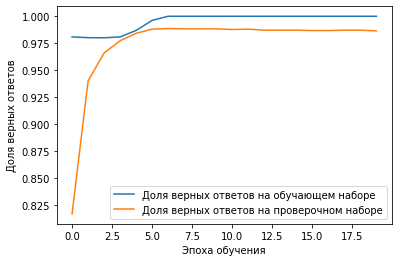

In [19]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(220, input_dim=maxWordsCount, activation="sigmoid"))
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))
model01.compile(optimizer="adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


#Распознавание проверочной выборки

*Разбор данного раздела:* https://youtu.be/1goYctVeppE?t=6482


In [0]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [22]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 100% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 100% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 97% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 100% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 97% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 100% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 98%

